<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [1]:
from util import get_subway_graph, draw_subway_graph, graph2nx
from graphs import Graph

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]

{'color': '0d6928',
 'distance': 0.014782760229403606,
 'line': 4,
 'name': 'District Line',
 'stripe': 'NULL'}

In [16]:
def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """

    tree = Graph()
    pending = [x for x in G.nodes()]
    
    # Añadimos nuevos atributos a los nodos que utilizaremos
    # para realizar el algoritmo y conseguir el camino mas corto
    # de cada nodo i así realizar el MST
    # 'distancia' y 'parent'
    
    G.add_nodes_from(G.nodes(), attr_dict={'cost': 9999999999999, 'parent': None})
    G.add_node(origin, attr_dict = {'cost': 0})
    
    # Mientras tengamos nodos pendientes por procesar
    # buscaremos el nodo de menor distancia y lo eliminaremos de la lista de pendientes
    
    while pending:
        minimo_nodo = None
        for nodo in pending:
            if minimo_nodo is None:
                minimo_nodo = nodo
            if G.node[nodo]['cost'] < G.node[minimo_nodo]['cost']:
                minimo_nodo = nodo
        pending.remove(minimo_nodo)
        
        parent = G.node[minimo_nodo]['parent']
        
        # Si el nodo procesado tiene padre:
        # Lo añadiremos a nuestro arbol MST con sus características
        # Añadimos nodo y arista para poder mostrar el grafo después
        
        if parent is not None:
            tree.add_edge(parent,minimo_nodo, attr_dict = G.edge[parent][minimo_nodo])
            tree.add_node(parent, G.node[parent])
            tree.add_node(minimo_nodo, G.node[minimo_nodo])
        
        # Revisamos todos los vecinos del nodo procesado y actualizamos su información según
        # si cumple la condición.
        # d(u,v) = distancia real entre nodo eliminado y vecino
        # d(v) = prioridad/distancia del nodo vecino
        
        vecinos = G.neighbors(minimo_nodo)
        
        for vecino in vecinos:
            if vecino in pending:
                c1 = G.node[vecino]['cost']
                d1 = G.edge[minimo_nodo][vecino]['distance']

                if c1 > d1:
                    G.add_node(vecino, attr_dict = {'cost': d1, 'parent': minimo_nodo}) 
    return tree

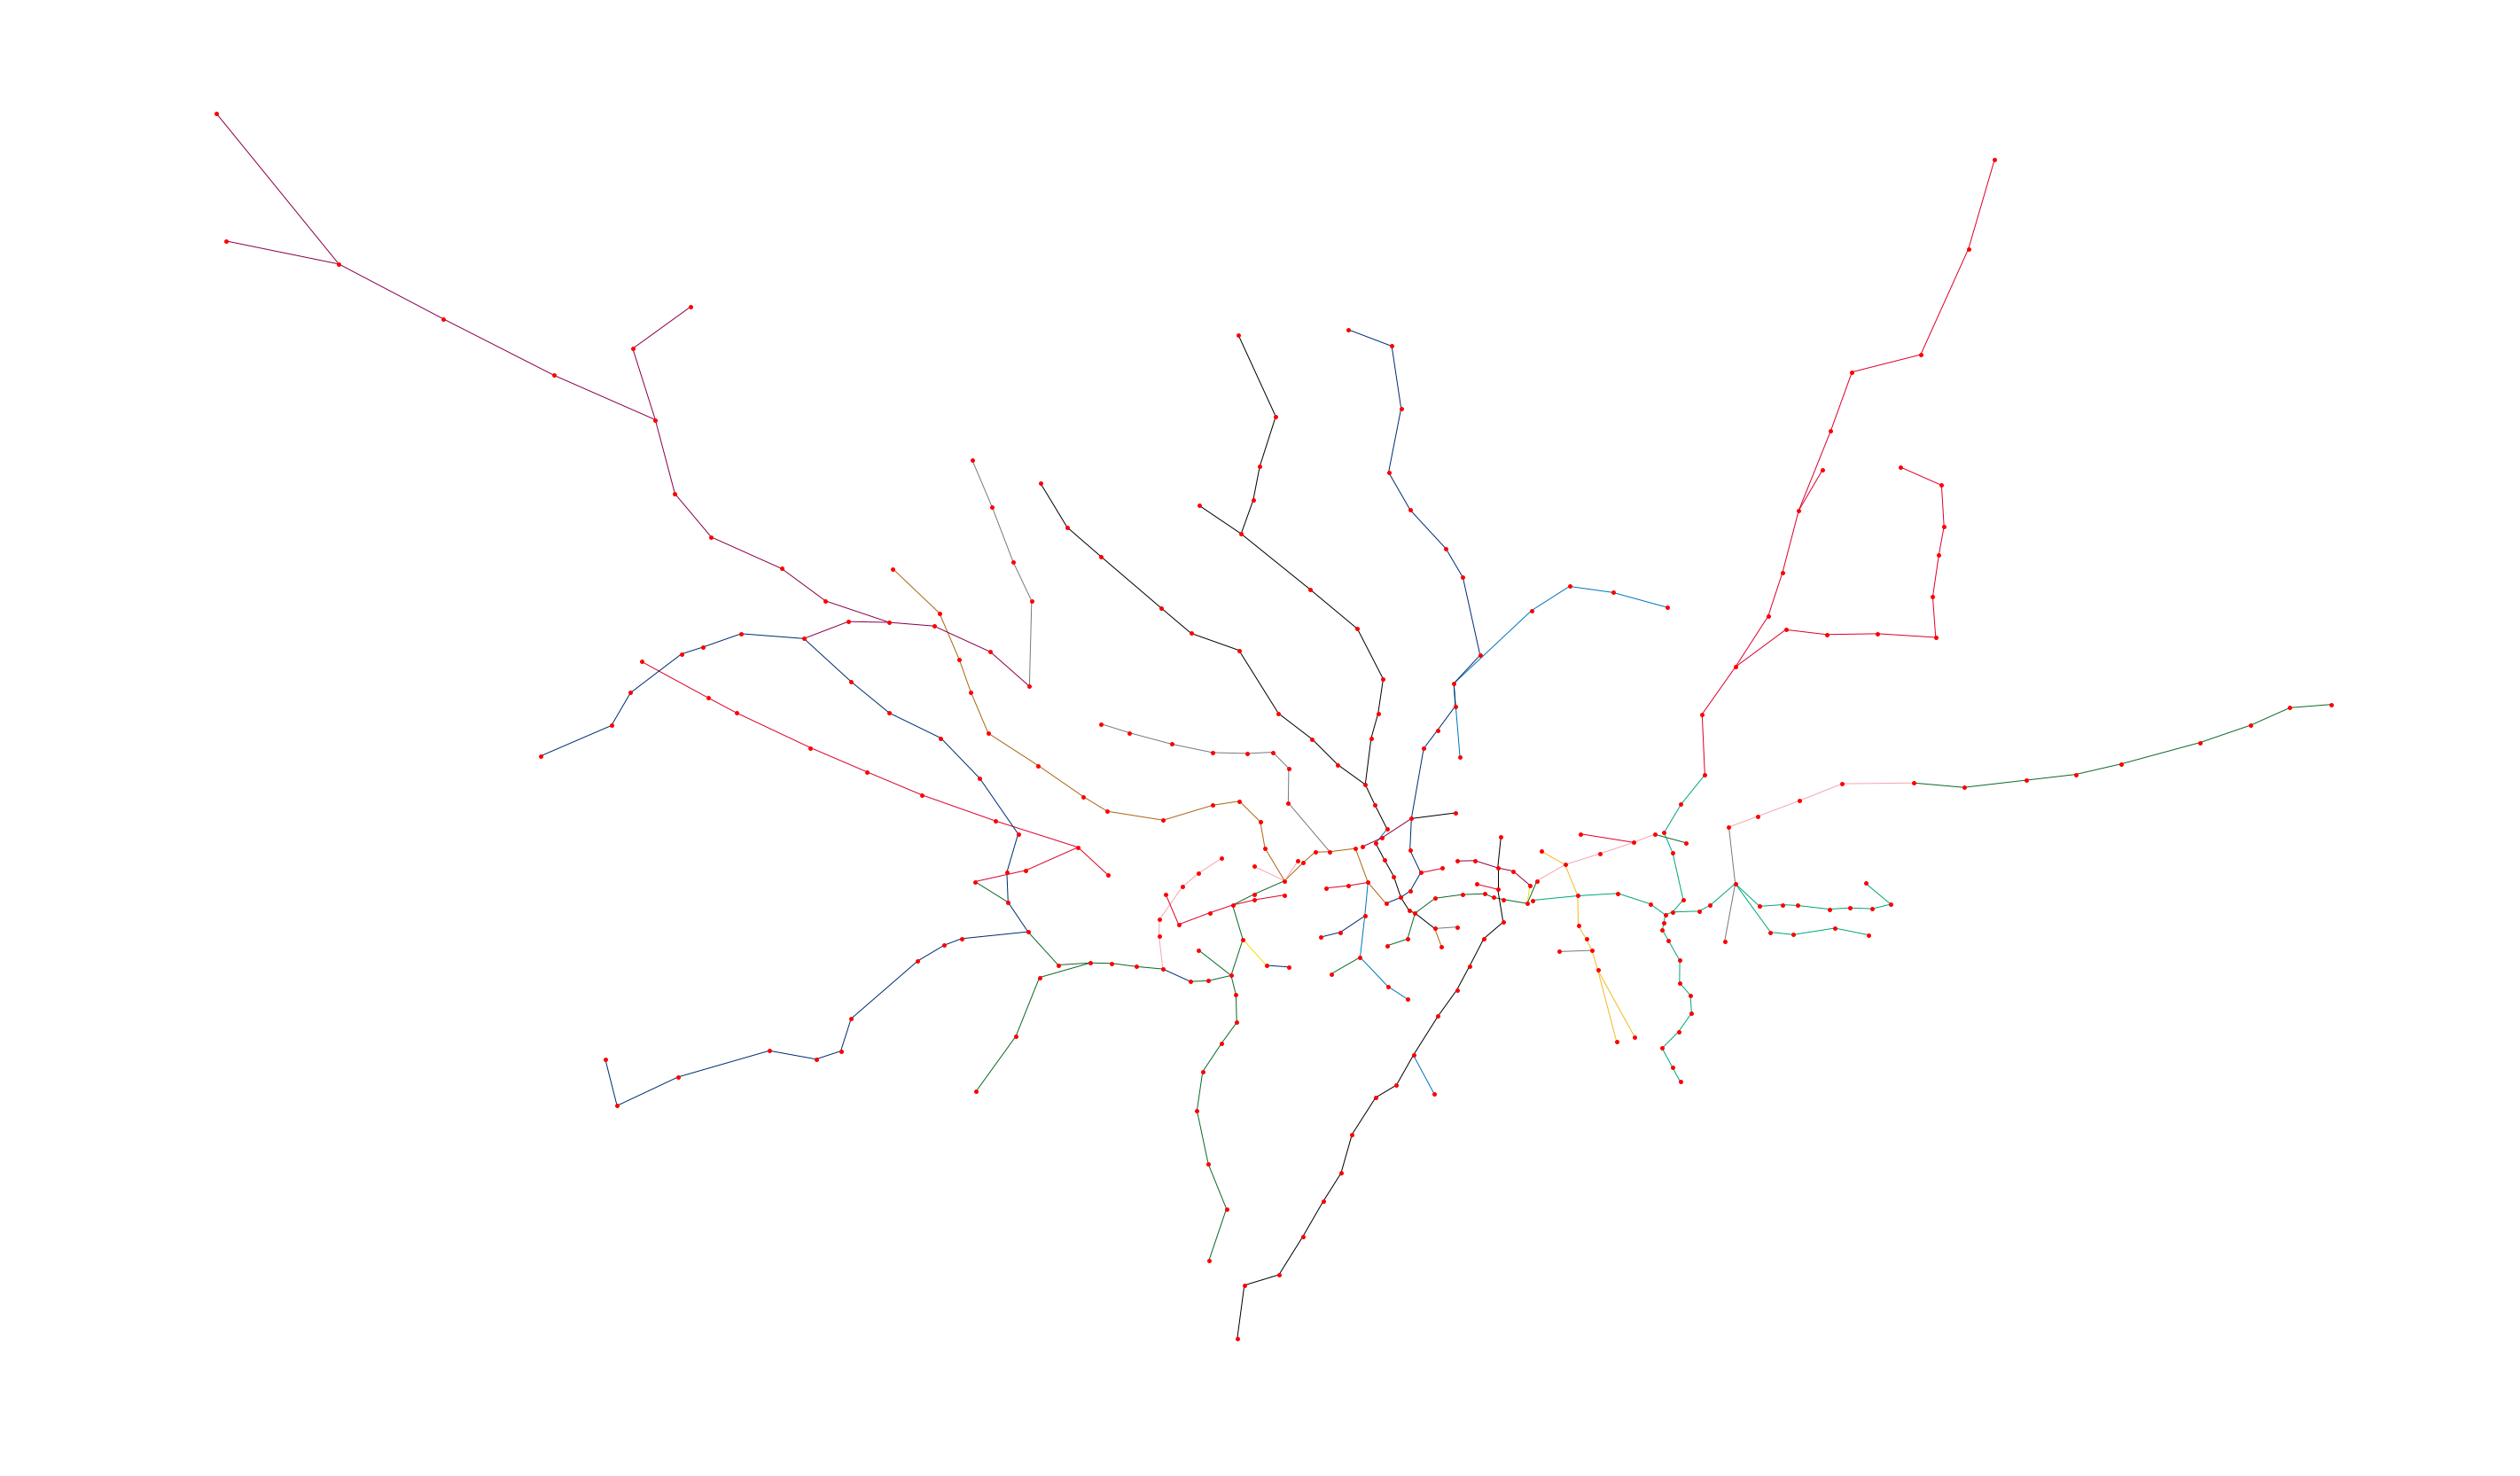

In [18]:
t = prim(G, G.nodes()[0])
#print(len(t.edges()))
#print(len(t.nodes()))

draw_subway_graph(t, lines, figsize=(50,30))

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


En las siguientes celdas se comprueba que el algoritmo implementado funciona correctamente para un grafo cualquiera mas pequeño:

En la primera celda implementamos un grafo mucho más pequeño que el problema que queremos resolver para hacer mas fácil comprobar su funcionamiento.

En la segunda celda implementaremos el algoritmo de prim.

Finalmente se muestra la ejecución.


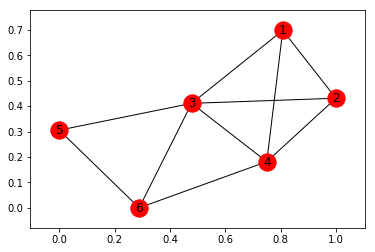

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

P = Graph()
x = [1, 2, 3, 4, 5, 6]
P.add_nodes_from(x)
P.add_edge(1, 2, attr_dict = {'distance': 6})
P.add_edge(1, 3, attr_dict = {'distance': 5})
P.add_edge(1, 4, attr_dict = {'distance': 4})
P.add_edge(2, 4, attr_dict = {'distance': 2})
P.add_edge(2, 3, attr_dict = {'distance': 1})
P.add_edge(3, 4, attr_dict = {'distance': 2})
P.add_edge(3, 5, attr_dict = {'distance': 5})
P.add_edge(3, 6, attr_dict = {'distance': 3})
P.add_edge(4, 6, attr_dict = {'distance': 4})
P.add_edge(5, 6, attr_dict = {'distance': 4})

rs = graph2nx(P)

nx.draw_networkx(rs, with_labels = True)
plt.draw()
plt.show()

In [14]:
def pr(P, origin=None):
        
    f = Graph()
    
    pending = [x for x in P.nodes()]
    
    P.add_nodes_from(P.nodes(), attr_dict={'cost': 9999999999999, 'parent': None})
    P.add_node(origin, attr_dict = {'cost': 0})
    
    
    while pending:
        minimo_nodo = None
        for nodo in pending:
            if minimo_nodo is None:
                minimo_nodo = nodo
            if P.node[nodo]['cost'] < P.node[minimo_nodo]['cost']:
                minimo_nodo = nodo
        pending.remove(minimo_nodo)
        
        par = P.node[minimo_nodo]['parent']
        
        if par is not None:
            f.add_edge(par,minimo_nodo)
            
        vecinos = P.neighbors(minimo_nodo)
        
        for vecino in vecinos:
            if vecino in pending:
                c1 = P.node[vecino]['cost']
                d1 = P.edge[minimo_nodo][vecino]['distance']

                if c1 > d1:
                    P.add_node(vecino, attr_dict = {'cost': d1, 'parent': minimo_nodo})
                    
    return f

Aristas [(1, 4), (4, 2), (2, 3), (3, 6), (6, 5)]


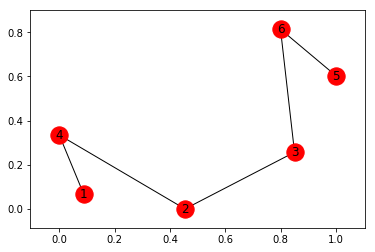

In [15]:
j = pr(P, 1)
print("Aristas", j.edges())
a = graph2nx(j)

nx.draw_networkx(a, with_labels = True)
plt.draw()
plt.show()

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Para implementar el algoritmo se ha utilizado como base el codigo utilizado de la práctica anterior "Dijkstra".
Partiendo de ese codigo se han realizado modificaciones como:

- Se ha modificado la condición de evaluación en los vecinos del nodo que hemos eliminado de nuestra lista de nodos por procesar.

Ahora solo se compara:
- La distancia entre el nodo procesado y sus vecinos.
- El coste actual que tiene el nodo vecino.

Así mismo se ha obtado por eliminar la lista de visitados que se tenia antes y utilizar la lista de nodos pendientes para comprobar si el vecino ya habia sido procesado o no y así optimizar mejor el problema.

 Por otra parte para conseguir el MST utilizamos nuestro propio bucle de nodos pendintes para ir añadiendo durante el proceso las aristas a nuestro nuevo grafo (MST) "T" comprobando si el nodo procesado tiene un parent. Así evitamos tener que realizar un bucle despues de haber procesado todos los nodos.
 
Evaluación de la complejidad:

La fase de inicialización tiene un coste de  O(V) ya que tenemos que inicializar todos nuestros nodos con ciertos valores:
Parent y coste.

Nuestro bucle While se ejecuta un total de |V| veces y nuestro bucle For dentro de nuestro bucle while se ejecuta según el grado de nuestro nodo procesado, es decir Grado(u) veces.

La complejidad real de nuestro algoritmo depende principalmente de la estructura de datos utilizada. en mi caso no he utilizado una cola de prioridad. He utilizado un array/Lista.


Definiendo la complejidad del algoritmo como:

O (V) |V| x costeEliminarMinimo  + O |E| * DecrecerKey

Por tanto la complejidad del algoritmo en eliminar la podemos definir como:

|V| x costeEliminarMinimo 

Donde V = #vertices y costeEliminarMinimo = O(V) 

Siendo así O(V^2) la complejidad de nuestro algoritmo.

Por otra parte como no tenemos que elimiar ninguna Key de distancia de nuestra estrucutra el coste es O(1) por lo que en general podemos concluir que nuestra complejidad será.

O(V^2)


<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>